In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
import seaborn as sns

In [26]:
#Load the dataset
csv_path = '/Users/andrewfearney27/cleaned_battle_deaths.csv'
df = pd.read_csv(csv_path)

In [27]:
#Q3
data_sub = df.reset_index()


In [28]:
#Filter data for region '1', which we assume corresponds to Africa
data_sub = df[df['region'] == '1'].copy()

#Ensure 'year' column is of integer type
data_sub['year'] = data_sub['year'].astype(int)

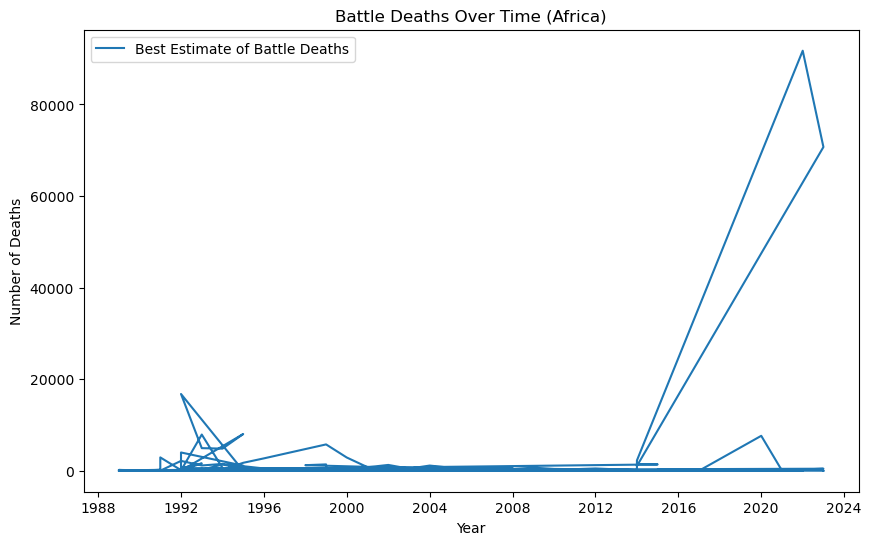

In [29]:
#Q4
#Set 'year' column as index
from datetime import datetime

data_sub['year'] = pd.to_datetime(data_sub['year'], format='%Y')
data_sub = data_sub.set_index('year')

#Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(data_sub.index, data_sub['bd_best'], label='Best Estimate of Battle Deaths')
plt.title('Battle Deaths Over Time (Africa)')
plt.xlabel('Year')
plt.ylabel('Number of Deaths')
plt.legend()
plt.show()

<Figure size 1200x800 with 0 Axes>

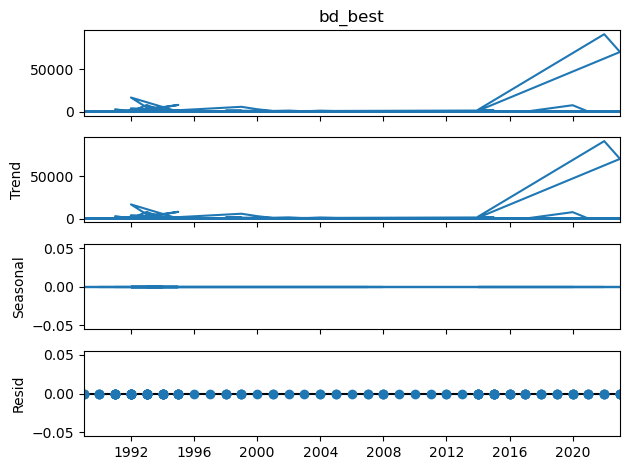

In [30]:
#Q5
from statsmodels.tsa.seasonal import seasonal_decompose

#Perform seasonal decomposition
decomposition = seasonal_decompose(data_sub['bd_best'], model='additive', period=1)

#Plot the decomposition
plt.figure(figsize=(12, 8))
decomposition.plot()
plt.show()

In [31]:
#The seasonal decomposition of the time series data shows the following components:
#Trend**: The long-term progression of the data.
#Seasonal**: The repeating short-term cycle in the series.
#Residual**: The random variation in the data.


In [32]:
#Q6
from statsmodels.tsa.stattools import adfuller

result = adfuller(data_sub['bd_best'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -5.315735
p-value: 0.000005
Critical Values:
	1%: -3.488
	5%: -2.887
	10%: -2.580


In [33]:
#The Dickey-Fuller test results indicate the following:
#ADF Statistic**: -5.315735
#p-value**: 0.000005

#Since the p-value is less than 0.05, we reject the null hypothesis that the data has a unit root, implying the data is stationary.

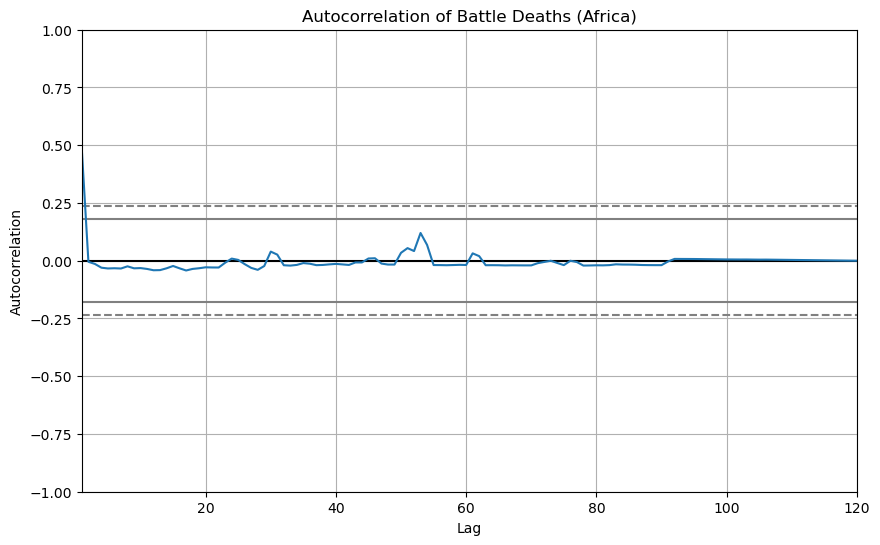

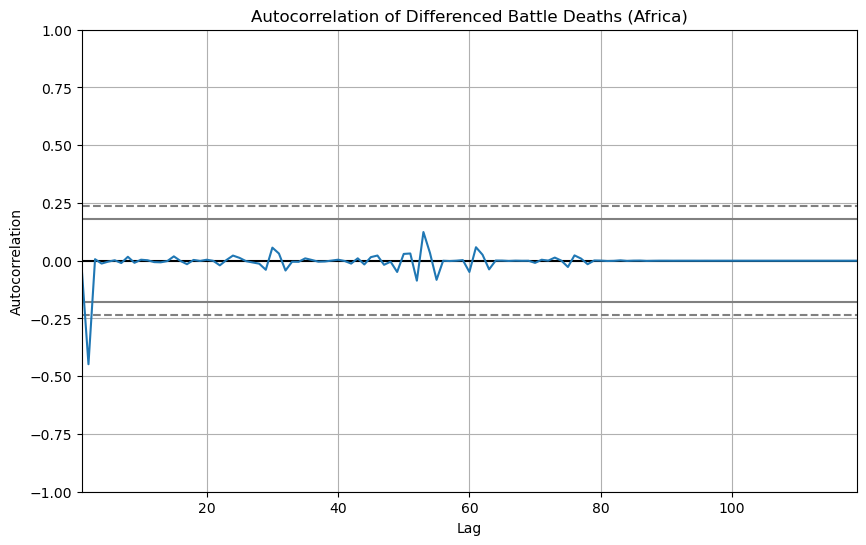

In [34]:
#Q8
from pandas.plotting import autocorrelation_plot

#Plot the autocorrelation of the original data
plt.figure(figsize=(10, 6))
autocorrelation_plot(data_sub['bd_best'])
plt.title('Autocorrelation of Battle Deaths (Africa)')
plt.show()

#If the data was differenced
plt.figure(figsize=(10, 6))
autocorrelation_plot(data_diff)
plt.title('Autocorrelation of Differenced Battle Deaths (Africa)')
plt.show()


In [35]:
#Q7
#Differencing the data
data_diff = data_sub['bd_best'].diff().dropna()

#Conduct the Dickey-Fuller test again
result_diff = adfuller(data_diff)

#Print the test statistic and p-value after differencing
print('ADF Statistic after differencing:', result_diff[0])
print('p-value after differencing:', result_diff[1])


ADF Statistic after differencing: -6.968451266617494
p-value after differencing: 8.790321197723233e-10


In [36]:
#The autocorrelation plot shows the correlation of the time series with its own past values. 
#Significant autocorrelation indicates that the past values have an influence on current values. 

#Original Data**: Shows the autocorrelation of the battle deaths data over time.
#Differenced Data**: If differencing was necessary, the plot would show the autocorrelation of the differenced data.
